In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('weather_data_hourly.csv')
df = df.iloc[:, 1:]
df["date"] = pd.to_datetime(df["date"])
df

,date,temperature_2m,precipitation,weather_code,relative_humidity_2m,snowfall,rain
0,2024-01-01 00:00:00+00:00,7.2365,0.0,1.0,74.932175,0.0,0.0
1,2024-01-01 01:00:00+00:00,7.2365,0.0,1.0,71.050270,0.0,0.0
2,2024-01-01 02:00:00+00:00,7.2365,0.0,1.0,71.050270,0.0,0.0
3,2024-01-01 03:00:00+00:00,6.9865,0.0,2.0,72.276660,0.0,0.0
4,2024-01-01 04:00:00+00:00,6.6865,0.0,2.0,74.306190,0.0,0.0
...,...,...,...,...,...,...,...
8779,2024-12-31 19:00:00+00:00,5.4365,0.0,3.0,88.490330,0.0,0.0
8780,2024-12-31 20:00:00+00:00,5.6865,0.0,3.0,88.512160,0.0,0.0
8781,2024-12-31 21:00:00+00:00,5.7365,0.0,3.0,89.139820,0.0,0.0
8782,2024-12-31 22:00:00+00:00,5.5865,0.0,3.0,91.662360,0.0,0.0


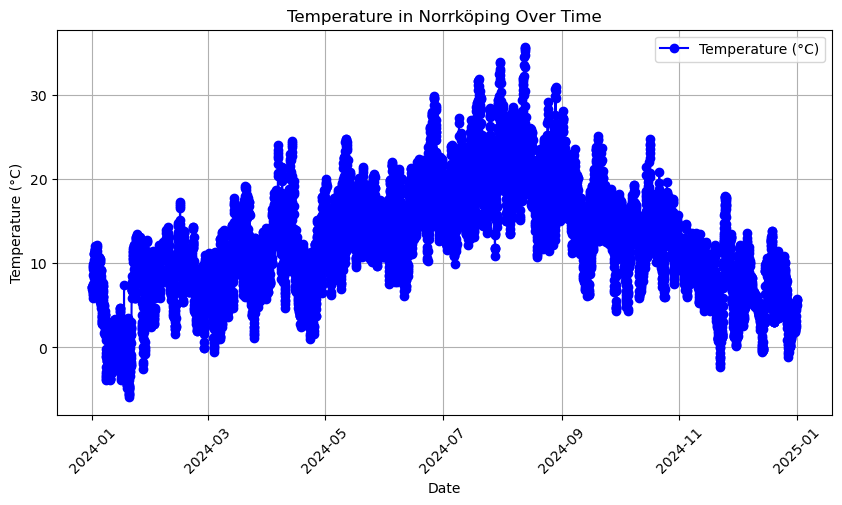

In [2]:
# Plot the data
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(df["date"], df["temperature_2m"], label="Temperature (°C)", color="blue", marker="o")

# Format the X-axis
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature in Norrköping Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid()

plt.show()

In [15]:
df["day"] = df["date"].dt.date

daily_weather = df.groupby("day").agg(
    temperature_2m_mean=("temperature_2m", "mean"),
    precipitation_sum=("precipitation", "sum")
).reset_index()

print(daily_weather.head())

          day  temperature_2m_mean  precipitation_sum
0  2024-01-01             8.030250                3.6
1  2024-01-02            11.144834               12.1
2  2024-01-03             9.892750                2.7
3  2024-01-04             9.096917                1.7
4  2024-01-05             6.521917                0.0


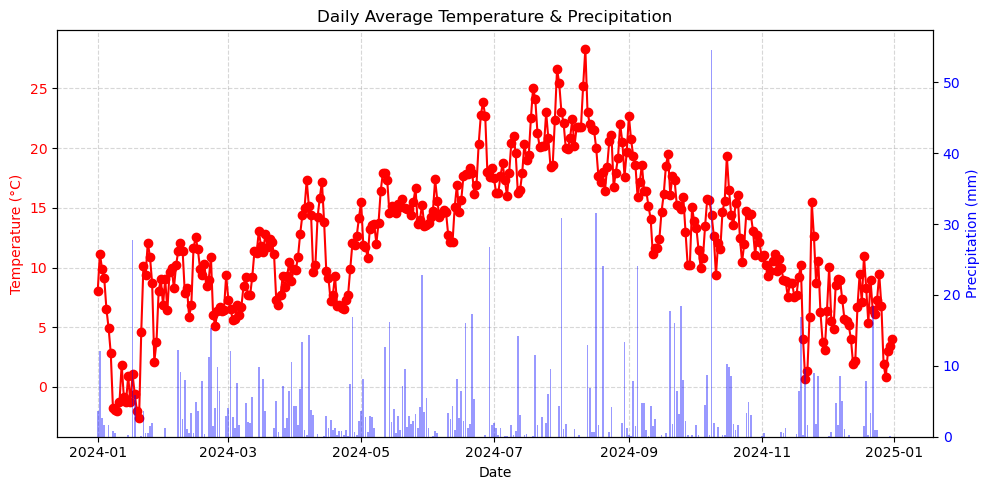

In [22]:
daily_weather["day"] = pd.to_datetime(daily_weather["day"])

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Temperature (Line Plot)
ax1.plot(daily_weather["day"], daily_weather["temperature_2m_mean"], color="red", marker="o", label="Avg Temperature (°C)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (°C)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Create a second y-axis for precipitation
ax2 = ax1.twinx()
ax2.bar(daily_weather["day"], daily_weather["precipitation_sum"], color="blue", alpha=0.4, label="Total Precipitation (mm)")
ax2.set_ylabel("Precipitation (mm)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Improve x-axis labels
plt.xticks(rotation=45)

# Add grid, title, and legend
ax1.grid(True, linestyle="--", alpha=0.5)
plt.title("Daily Average Temperature & Precipitation")
fig.tight_layout()

# Show the plot
plt.show()